In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

# Since for feature scaling standardscaler class expects a 2d array and not a 1d array hence tranform it into 2d array
y = y.reshape(len(y),1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [36]:
# As we can see if we don't apply feature scaling to salary and level i.e dependent and independent var then there is a chance that level values might be calculated.

from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_y= StandardScaler()

# We have to create different object Y? obviously we don't want same standard deviation and mean during standardisation
X= sc_X.fit_transform(X)
y= sc_y.fit_transform(y)



In [37]:
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [38]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)
# Doing it to whole data set


C:\Users\manur\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [39]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[252789.13921624]])

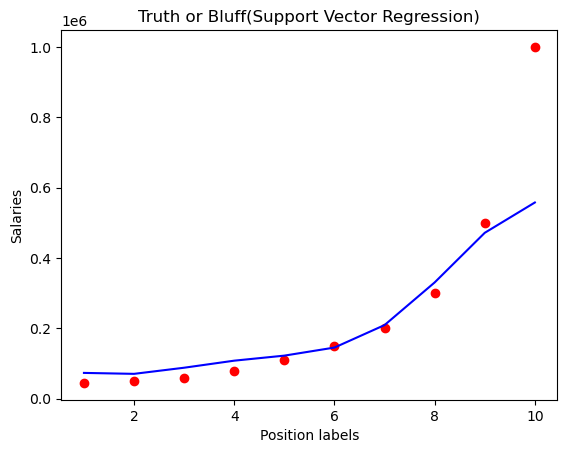

In [40]:

plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff(Support Vector Regression)')
plt.xlabel('Position labels')
plt.ylabel('Salaries')
plt.show()

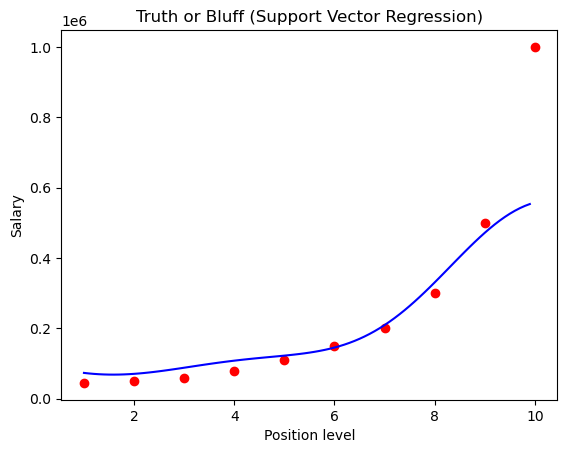

In [42]:
# Optionallll

# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(X_grid).reshape(-1,1)),color='blue')
plt.title('Truth or Bluff(Support Vector Regression)')
plt.xlabel('Position labels')
plt.ylabel('Salaries')
plt.show()